# Target calculation #


### Tiff's notes ###

 - could leave padding (-> target size) more flexible - but given that x2 always seems to work best this probably isn't necessary
 - pattern dimensions defined for the 512 x 512 (padded) plane: remember that these will turn out smaller for the 'true' 256 x 256 output plane! - or could just amend to double the size within the target definition. i.e. currently, if we want a 32-pixel diameter pattern, need to define diameter as 64 pixels!
 - always call the centre r0! Otherwise the plot will get upset :(
 - there's quite a lot of copying and pasting between the various targets. This is upsetting Sam.

### Preamble; plot setup ###

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os

%matplotlib inline

def quick_plot(target, params):
    N = target.shape[0]
    x0 = params['r0'][0]
    
    plot_args = {'extent': [0, N, 0, N],
                 'interpolation': 'None',
                 'origin': 'lower'}
    fig, axes = plt.subplots(ncols=2)
    axes[0].imshow(target, **plot_args)
    axes[0].set_title('Target')
    axes[1].plot(target[x0,:])
    axes[1].set_title('Target (cross-section)')

## Targets ##

### 2nd order power-law ###

Saved to initialisation/example_power2_512_(350,350)_64/target.dat


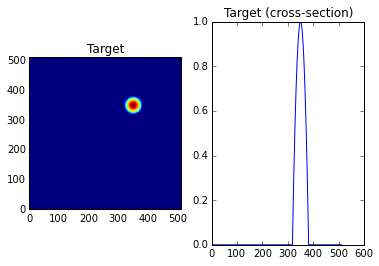

In [7]:
def make_power2(n, r0, d, A=1.0):
    """
    Create n x n target: 
    2nd order power law centred on r0=(x0,y0) with diameter d and amplitude A
    """
    x = np.array(range(n))*1.
    X, Y = np.meshgrid(x, x)
    
    delta_r2 = np.power(X - r0[0], 2) + np.power(Y - r0[1], 2)
    z = A - 4*A/d**2 * delta_r2
    z[delta_r2 > d**2/4] = 0
    
    return z

params = {'n': 512,
          'r0': (350, 350),
          'd': 64,
          'A': 1.0}
t = make_power2(**params)

targetdir = 'initialisation/example_power2_{n}_{r0}_{d}/'.format(**params).replace(' ', '')
if not os.path.exists(targetdir):
    os.makedirs(targetdir)

filename = os.path.join(targetdir, 'target.dat')
quick_plot(t, params)
np.savetxt(filename, t)
print 'Saved to ' + filename

### Superlorentzian (square) ###

Saved to targets/example_superlorentzian_square_10_512_(350,350)_26.dat


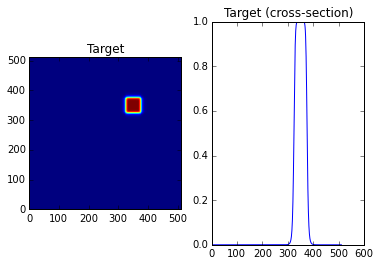

In [5]:
def make_superlorentzian_square(n, r0, d, p, A=1.0):
    """
    Create n x n target: 
    p-th order Superlorentzian centred on r0=(x0,y0) with radius diameter d and amplitude A
    """
    x = np.array(range(n))*1.
    X, Y = np.meshgrid(x, x)
    
    z = A/((1+((X-r0[0])/d)**p)*(1+((Y-r0[1])/d)**p))
    
    return z

params = {'n': 512,
          'r0': (350, 350),
          'd': 26,
          'p': 10,
          'A': 1.0}
t = make_superlorentzian_square(**params)

targetdir = 'initialisation/example_superlorentzian_square_{p}_{n}_{r0}_{d}/'.format(**params).replace(' ', '')
if not os.path.exists(targetdir):
    os.makedirs(targetdir)

filename = os.path.join(targetdir, 'target.dat')
quick_plot(t, params)
np.savetxt(filename, t)
print 'Saved to ' + filename

### Superlorentzian (circle) ###

Saved to targets/example_superlorentzian_circle_10_512_(350,350)_26.dat


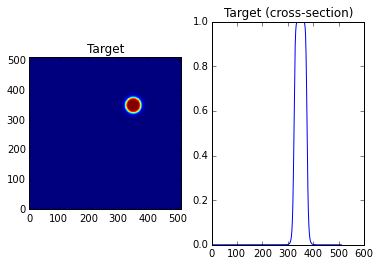

In [6]:
def make_superlorentzian_circle(n, r0, d, p, A=1.0):
    """
    Create n x n target: 
    p-th order Superlorentzian centred on r0=(x0,y0) with radius diameter d and amplitude A
    """
    x = np.array(range(n))*1.
    X, Y = np.meshgrid(x, x)
    
    delta_r2 = np.power(X - r0[0], 2) + np.power(Y - r0[1], 2)

    z = A/(1+(np.sqrt(delta_r2)/d)**p)
    
    return z

params = {'n': 512,
          'r0': (350, 350),
          'd': 26,
          'p': 10,
          'A': 1.0}
t = make_superlorentzian_circle(**params)

targetdir = 'initialisation/example_superlorentzian_circle_{p}_{n}_{r0}_{d}/'.format(**params).replace(' ', '')
if not os.path.exists(targetdir):
    os.makedirs(targetdir)
    
filename = os.path.join(targetdir, 'target.dat')
quick_plot(t, params)
np.savetxt(filename, t)
print 'Saved to ' + filename